C:\Users\swara\AppData\Local\Temp\ipykernel_9928\2518937063.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(tickers, start=startDate, end=endDate)['Close']
[*********************100%***********************]  3 of 3 completed


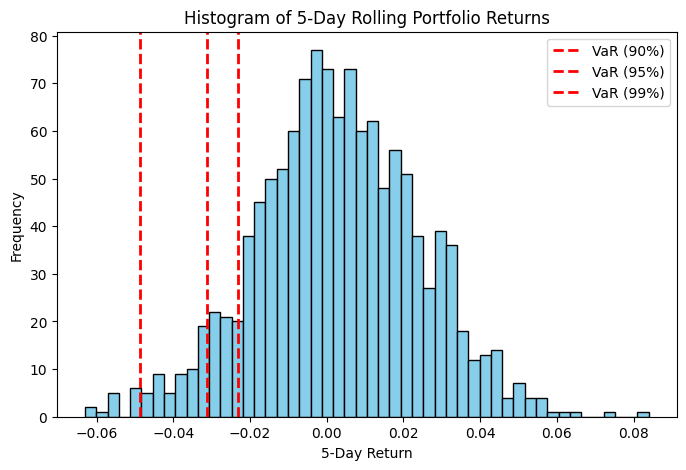

In [50]:
#Import Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from scipy.stats import norm
import yfinance as yf

# Set date and time for Model
years = 5
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=years*365)

# Create a List of stock tickers
tickers = ['INFY.NS', 'CIPLA.NS', 'ITC.NS']

# Fetch the adjusted closing price using yfinance
prices = yf.download(tickers, start=startDate, end=endDate)['Close']
prices = pd.DataFrame(prices)

# Calaculate Daily Log Returns
log_returns = np.log(prices / prices.shift(1))
log_returns = log_returns.dropna()

# Calculate Equally Weighted Portfolio Returns
portfolio_value = 1000000  # Initial portfolio value
weights = np.array([1/len(tickers)]* len(tickers))

# Calculate daily portfolio returns
portfolio_returns = log_returns.dot(weights)

# Find X Day Historical Returns
days = 5
range_returns = portfolio_returns.rolling(window=days).sum().dropna()

# Create Covariance Matrix and Calculate Portfolio Standard Deviation
cov_matrix = log_returns.cov() * 252  # Annualize the covariance matrix
portfolio_std_dev = np.sqrt((weights.T @ (cov_matrix @ weights)))
""" print(f"Annualized portfolio volatility: {portfolio_std_dev:.2%}") """

# Calculate Value at Risk (VaR) using Parametric Method
confidence_level = [0.9,0.95,0.99]

VaRs = []
for cl in confidence_level:
    z_score = norm.ppf(1 - cl)
    VaR = abs(portfolio_value * (z_score * portfolio_std_dev))
    VaRs.append(VaR)

# Create a DataFrame to display VaR results
VaR_df = pd.DataFrame({
    'Confidence Level': confidence_level,
    'VaR': VaRs
})
VaR_df

# Visualize the VaR results
plt.figure(figsize=(8, 5))
plt.hist(range_returns, bins=50, color='skyblue', edgecolor='black')

# Plot a VaR line for each confidence level:
for cl in confidence_level:
    var_cutoff = np.percentile(range_returns, (1 - cl) * 100)
    plt.axvline(var_cutoff, color='red', linestyle='dashed', linewidth=2,
                label=f'VaR ({int(cl * 100)}%)')

plt.title(f'Histogram of {days}-Day Rolling Portfolio Returns')
plt.xlabel(f'{days}-Day Return')
plt.ylabel('Frequency')
plt.legend()
plt.show()